# Measures of Central Tendency

There are three measures of central tendency defined in simple terms as follows:
1. Mean: The average of the numbers in the dataset.
2. Mode: The most frequent occuring term in the dataset.
3. Median: The middle term of the dataset.

Trivia: Median has the same number of letters as the word 'Middle'.

## Mean vs Median

Let us take a list of numbers: 50, 60, 70, 80, 90

Mean = $\sum_{i=1}^{n}x_{i}/n$
Hence, Mean = (50+60+70+80+90)/5 = 70
While, the median is the middle value ie also 70!
Now, let us add another number to the list.

The new list becomes: 50, 60, 70, 80, 90, 1000!
Now, the new mean = (50+60+70+80+90+1000)/6 = 1350/6 = 225!
While the median is the average of the two middle values ie (70+80)/2 = 75!

Thus, the mean is clearly very sensitive to extreme values while the median is hardly affected by such outliers in the data.

## Mean vs Mode

The mode is the most frequent number of occurences of a data point in the entire data, and it is the basis for the nearest neighbours algorithm which is a lazy learner and is used through majority voting in the classifiers. It is not prone to outliers unlike the mean.

**The million dollar question is when to use mean, median or mode for missing value treatment or studying the data patterns??**

It depends on the distribution of the data that determines the suitability of the measure of central tendency.
- In case of Symmetric Distribution, the data is having mean = median = mode. Hence, the mean will be a good measure to replace missing values because it will have the properties of the entire data, and the data is free of outliers.
- In case of Asymmetric Distribution, the data may be right skewed or left skewed.The median is the perfect measure for missing value treatment then because the mean lies in the skew and can create a bias upon substitution.
- Mode is generally used as a replacement for missing values in categorical variables because it can create a bias in continous data<br/>

![alt-text](https://raw.githubusercontent.com/vgaurav3011/Statistics-for-Machine-Learning/master/images/Mean%2C%20Median%2C%20Mode.jpg)<br/>

To sum it up,
1. Nominal variable: Mode
2. Ordinal variable: Median
3. Continous Interval(not skewed): Mean
4. Continous Interval(skewed): Median


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
df = pd.read_csv("data/CardioGoodFitness.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


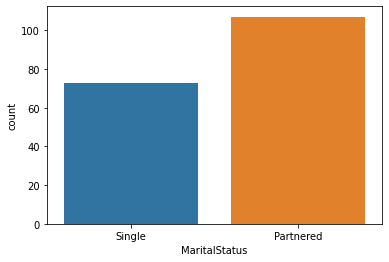

In [5]:
sns.countplot(data=df, x="MaritalStatus")

In [8]:
# We make use of the function mean to determine mean, let us try it on income column
print("Mean Income: ", df["Income"].mean())
print("Median Income: ", df["Income"].median())
print("Mode Income: ", df["Income"].mode())

Mean Income:  53719.57777777778
Median Income:  50596.5
Mode Income:  0    45480
dtype: int64


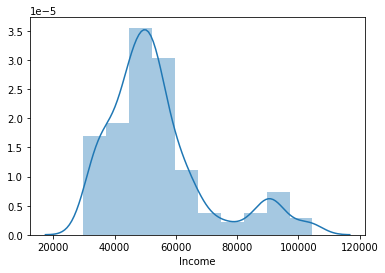

In [10]:
# Plot distribution of income column
x = df["Income"]
sns.distplot(x, bins=10)

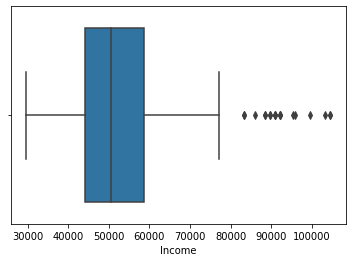

In [12]:
# The first IQR is from nearly 43000, followed by median at 50000 and further third IQR at 59000
sns.boxplot(x)

In [15]:
# There is no missing values in the entire data
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

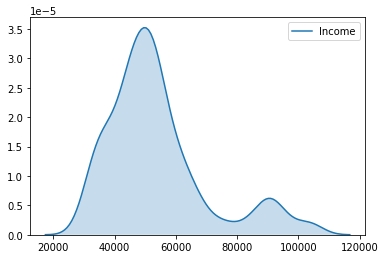

In [16]:
# The data is left skewed to almost normal distribution with a few outliers on the right side
sns.kdeplot(x, shade=True)

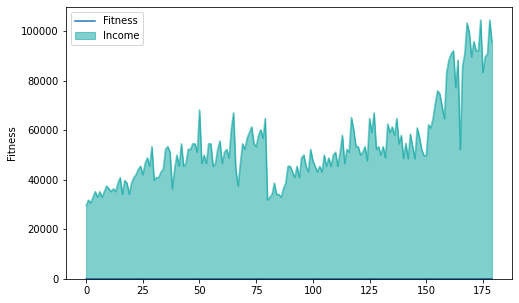

In [19]:
# We can observe that the fitness increases with the income indicating better access to resources
df.Income.plot(kind='area', figsize=(8,5), color='#00A19D', alpha=.5)
df.Fitness.plot()
plt.ylabel('Fitness')
plt.legend(loc='upper left')

In [20]:
# Let us try to manually calculate the mean without any prebuilt function
x, n = 0.0, 0

for money in df.Income:
    x += money

n = len(df.Income)

mean = x / n
mean

53719.57777777778

In [21]:
# To cross verify lets try using numpy too
np.mean(df.Income)

53719.57777777778

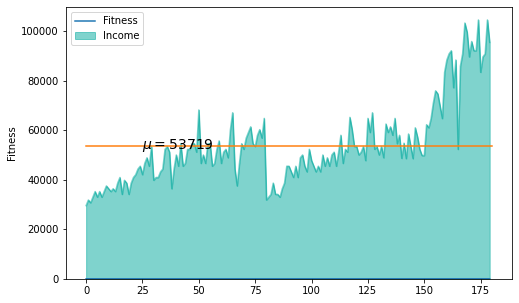

In [24]:
# Plot the mean, with Income and Fitness
df.Income.plot(kind='area', color='#00A99D', alpha=.5, figsize=(8,5))
df.Fitness.plot(legend=True)
plt.plot([0, len(df.Income)],[mean, mean])
plt.ylabel('Fitness')
plt.text(25, mean-1200, r'$\mu=' + str(int(math.floor(mean))) + '$', fontsize=14)
plt.legend(loc='upper left')

If there were missing values in the data, then it makes sense to make use of the median owing to the skewness in the data. So, we make use of median that will be insensitive to the outliers. If the number of observations $n$ is even, we have to take the mean of the two middle values. We calculate for a zero based index.
$$n\ is\ odd:\ \ x_{median}=x_{\frac{n-1}{2}}$$

$$n\ is\ even:\ \ x_{median}=\frac{x_\frac{n-2}{2}+x_\frac{n}{2}}{2}$$

In [53]:
# Now let us try calculating the median manually
median, n = 0.0, 0

# Number of data points
n = len(df.Income)
# sort the data points
df.sort_values("Income", axis = 0, ascending = True, inplace = True)
sorted_data = df["Income"]
if n % 2 == 0: 
    median1 = sorted_data[n//2] 
    median2 = sorted_data[(n//2) - 1] 
    median = (median1 + median2)/2
else: 
    median = sorted_data[n//2] 
print("Median is: " + str(median)) 

Median is: 45480.0


In [37]:
np.median(df.Income)

50596.5

Mode: 45480.0 with bucket size 1000


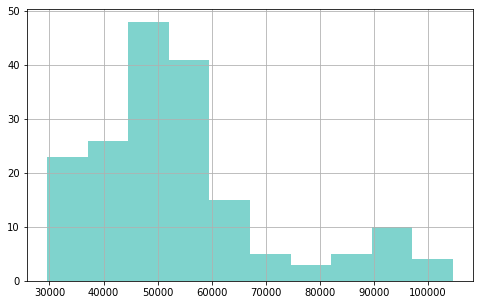

In [55]:
# Let us try to calculate mode now
bucket_size = 1000
bucket_calculator = lambda x: int(x) / bucket_size * bucket_size

df['bucket'] = df.Income.apply(bucket_calculator)
bucket_min = df.bucket.min()
bucket_max = df.bucket.max()
bins = (bucket_max-bucket_min)/bucket_size

df.bucket.hist(color='#00A99D', alpha=.5, bins=10, figsize=(8,5))

print('Mode:', df.groupby('bucket').Income.count().idxmax(), \
      'with bucket size', bucket_size)